<a href="https://colab.research.google.com/github/NotAbdelrahmanelsayed/Hands-on-machine-learning/blob/main/Chapter_5%3CSVM%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#support Vector Machine

**The SVM can work on both classification and regression problems, and it's very powerful for classification with small and medium datasets.** 

In [ ]:
# copied from https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

**train svm with standard scalar on iris dataset**

In [ ]:
# import all guyes ! 
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris['data'][:,(2,3)] #2 petal length, petal width 
y = (iris['target']==2).astype(np.float64) # iris virginica

svm_clf = Pipeline([
                    ('scalar',StandardScaler()),
                  ("linear_svc",LinearSVC(C=1, loss = "hinge"))
                  # the hinge loss is a loss function used for training classifiers.
                  ])
svm_clf.fit(X,y)


Pipeline(steps=[('scalar', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
svm_clf.predict([[5.5,1.7]])

array([1.])

#Nonlinear SVM Classification 
**wit adding an polynomial feature SVM works well in many casses let's figure it**


Saving figure higher_dimensions_plot


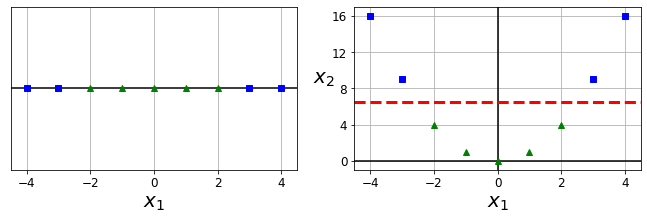

In [ ]:
#copy from https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

**Exercise: train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.**

In [ ]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
from sklearn.svm import LinearSVC , SVC
from sklearn.linear_model import SGDClassifier

C = 5 
alpha = 1 / (C*len(X))

#linearSVC
lin_clf = LinearSVC(loss='hinge', random_state = 42, C=C)
#SVC
svm_clf = SVC(kernel='linear', C=C)
#SGD
sgd_clf = SGDClassifier(alpha = alpha)



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Scale x 

X_scaled = scaler.fit_transform(X)


**fitting the models after scaling**

In [ ]:
lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:          ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:             ", svm_clf.intercept_, svm_clf.coef_)
print("SGD:               ", sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:           [0.28475098] [[1.05364854 1.09903804]]
SVC:              [0.31896852] [[1.1203284  1.02625193]]
SGD:                [0.45257758] [[1.66328019 1.42093187]]


**result are very close** 

##Excercise 9 : 
**train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?**

first i will upload minist from sklearn

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1 , as_frame = False)

X = mnist['data']
y = mnist['target'].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test  = X[60000:]
y_test = y[60000:]


In [ ]:
lin_clf = LinearSVC(random_state = 42)

lin_clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

thats bad accuracy , will try to scale the Data first

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(random_state=42)

In [ ]:

y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9214

92% nice

**let's try SVM with RBF kernal**

In [ ]:
svm_clf = SVC(kernel='rbf' )
svm_clf.fit(X_train_scaled, y_train)


SVC()

In [ ]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9866333333333334

**98.7% That's great !**